# Determining Default Payment from 23 Feature Variables

### Researcher: Sabrina Slattery

The problem given is a classification problem and will treated as such. The goal is to find the best model that can precisely determine whether or not a costumer will default on their credit card payments. The data given in the data set will be cleaned, analyzed, and run through four different models to see which of the different tested models give the highest degree of precision. 

This project is best treated as a supervised machine learning problem. The main reason for choosing this type over unsupervised learning is that the data is labeled.

#### Feature Variables Explained:

> X1: Amount of the given credit
>
> X2: Gender (1 = male; 2 = female)
>
> X3: Education (1 = graduate school; 2 = university; 3 = high school; 
    4 = others)
>
> X4: Marital status (1 = married; 2 = single; 3 = others)
>
> X5: Age
>
> X6-X11 = The repayment status in September through April, 2005. 

   >>(The measurement scale for the repayment status is: -1 = pay duly; 
   >>1 = payment delay for one month; 
   >>
   >>2 = payment delay for two months; 
   >>. . .; 
   >>8 = payment delay for eight months; 
   >>
   >>9 = payment delay for nine months and above.)

> X12-X17 = Amount of bill statement in September through April, 2005.
>
> X18-X23 = Amount of previous payments made in September through April, 2005.

---

### Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from collections import Counter

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, VotingClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve, train_test_split, ShuffleSplit
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression, LinearRegression, Perceptron
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, r2_score, precision_score, recall_score, f1_score, make_scorer

from imblearn.over_sampling import SMOTE

ModuleNotFoundError: No module named 'imblearn'

# Data Pre-Processing

### Import Data

In [4]:
df = pd.read_csv('https://raw.githubusercontent.com/franklin-univ-data-science/data/master/credit_default.csv')

df.head(5)

,ID,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


#### Rename Labels for Comprehension

In [5]:
df.columns = ['ID', 'Credit', 'Gender', 'Education', 'Mar_Stat', 'Age',
              'Stat_905', 'Stat_805', 'Stat_705', 'Stat_605', 'Stat_505', 'Stat_405',
              'Bill_905', 'Bill_805', 'Bill_705', 'Bill_605', 'Bill_505', 'Bill_405',
              'Prev_905', 'Prev_805', 'Prev_705', 'Prev_605', 'Prev_505', 'Prev_405',
              'Default_Pay']

df.head(5)

,ID,Credit,Gender,Education,Mar_Stat,Age,Stat_905,Stat_805,Stat_705,Stat_605,...,Bill_605,Bill_505,Bill_405,Prev_905,Prev_805,Prev_705,Prev_605,Prev_505,Prev_405,Default_Pay
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


# Cleaning the Data
### Finding nulls

In [5]:
df.isnull().sum()

ID             0
Credit         0
Gender         0
Education      0
Mar_Stat       0
Age            0
Stat_905       0
Stat_805       0
Stat_705       0
Stat_605       0
Stat_505       0
Stat_405       0
Bill_905       0
Bill_805       0
Bill_705       0
Bill_605       0
Bill_505       0
Bill_405       0
Prev_905       0
Prev_805       0
Prev_705       0
Prev_605       0
Prev_505       0
Prev_405       0
Default_Pay    0
dtype: int64

There are no null values in this dataset.

### Visualize the Feature Variables


The float data types are analyzed using catplots and scatterplots. Then, using factorplots, the discrete data types are analyzed and feature importance is determined.

#### Credit

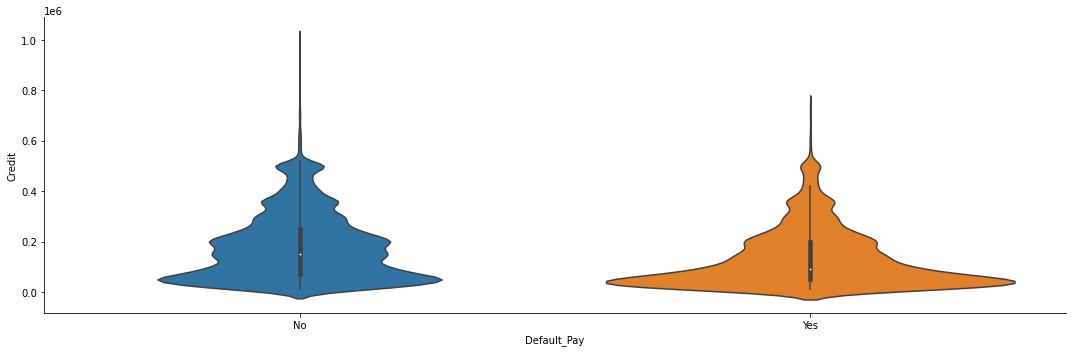

In [15]:
credit = sns.catplot(x="Default_Pay",y="Credit",data=df,kind="violin", height=5, aspect=3)
credit.set_ylabels("Credit")
credit.set_xticklabels(['No','Yes'])
credit

We see that the number of people defaulting their payments is much more concentrated on those with lower credit, possibly meaning that people with low credit are more likely to default their payments as opposed to those with higher credit as seen in the 'no' group.

"Credit" has at least one datapoint with a value of 1.00e6, which drastically changes the distribution of credit for those who do not default their payments.



#### Repayment Status

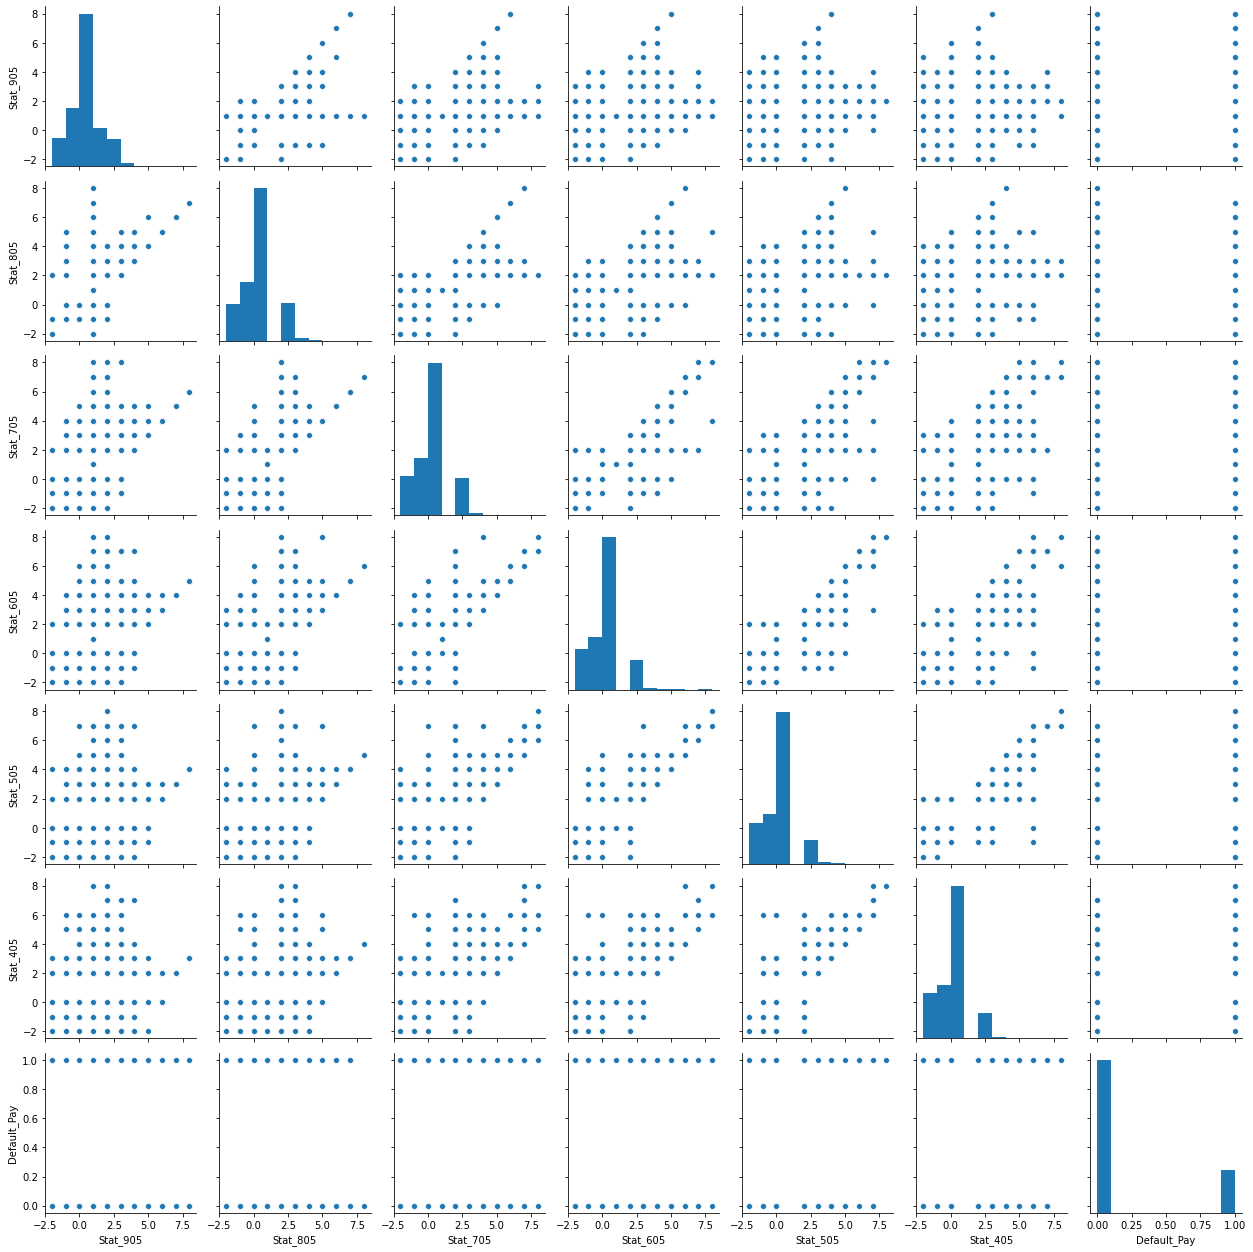

In [16]:
cols = ['Stat_905', 'Stat_805', 'Stat_705', 'Stat_605', 'Stat_505', 'Stat_405', 'Default_Pay']

sns.pairplot(df[cols], height=2.5)
plt.tight_layout()
plt.show()

For all 6 repayment status features, there are one or more values of -2, which is an illogical value.

#### Bill Amount

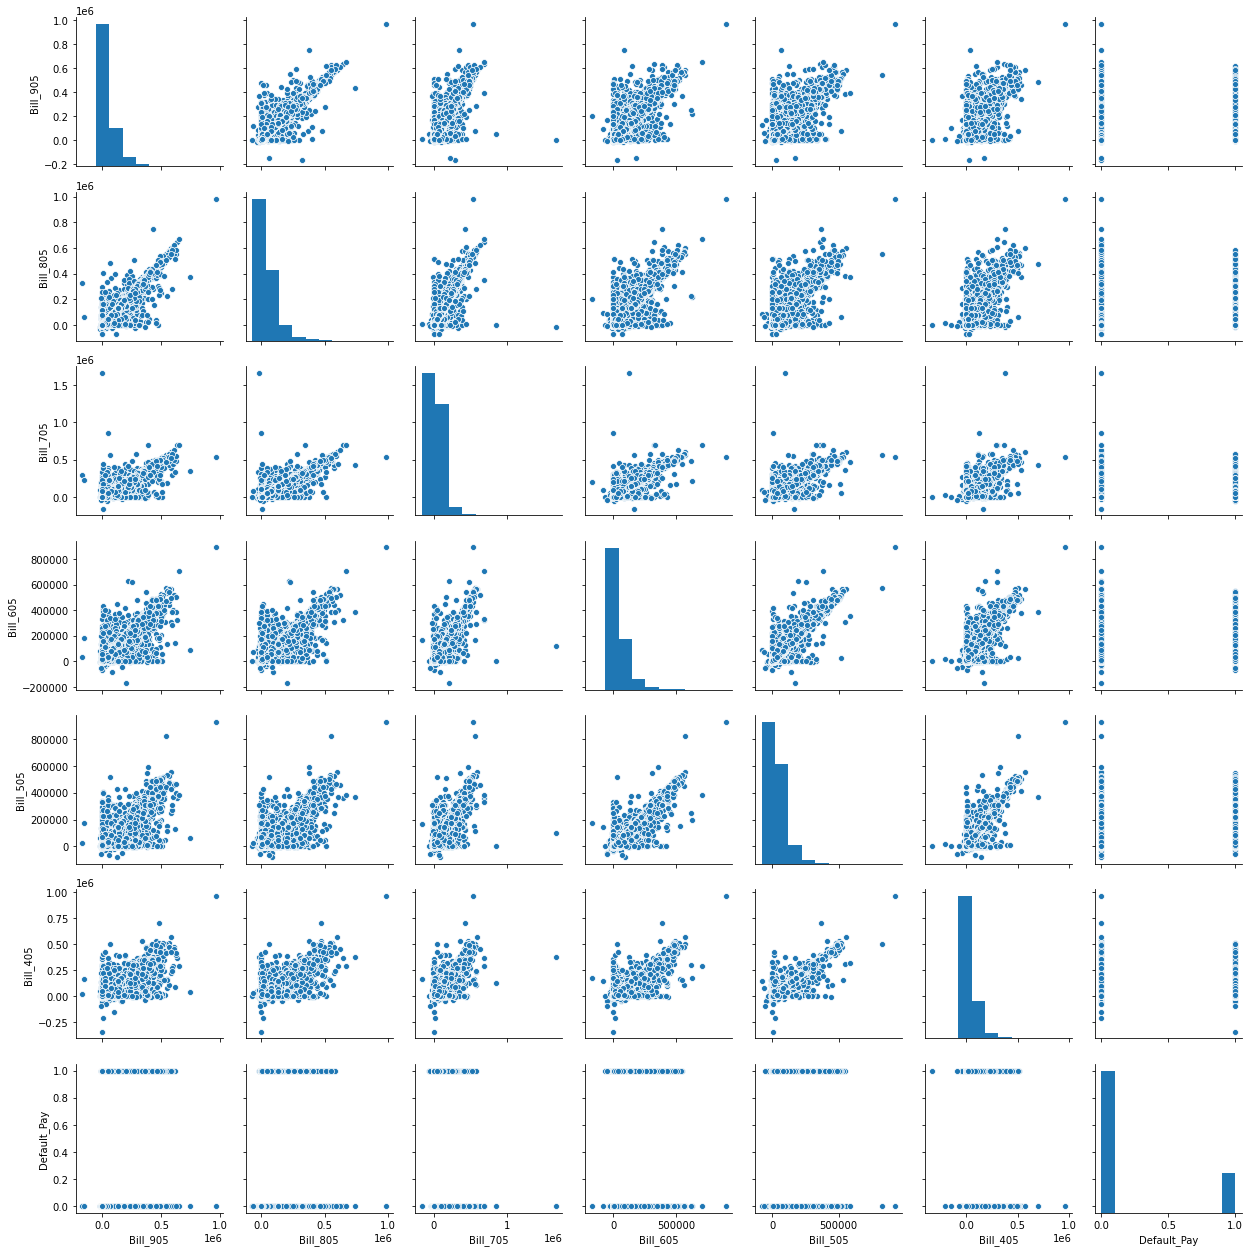

In [17]:
cols = ['Bill_905', 'Bill_805', 'Bill_705', 'Bill_605', 'Bill_505', 'Bill_405', 'Default_Pay']

sns.pairplot(df[cols], height=2.5)
plt.tight_layout()
plt.show()

For all 6 bill amount features, there is at least one value = 1.00e6, which can be considered an outlier and will need to be or addressed.

#### Previous Payment Amount

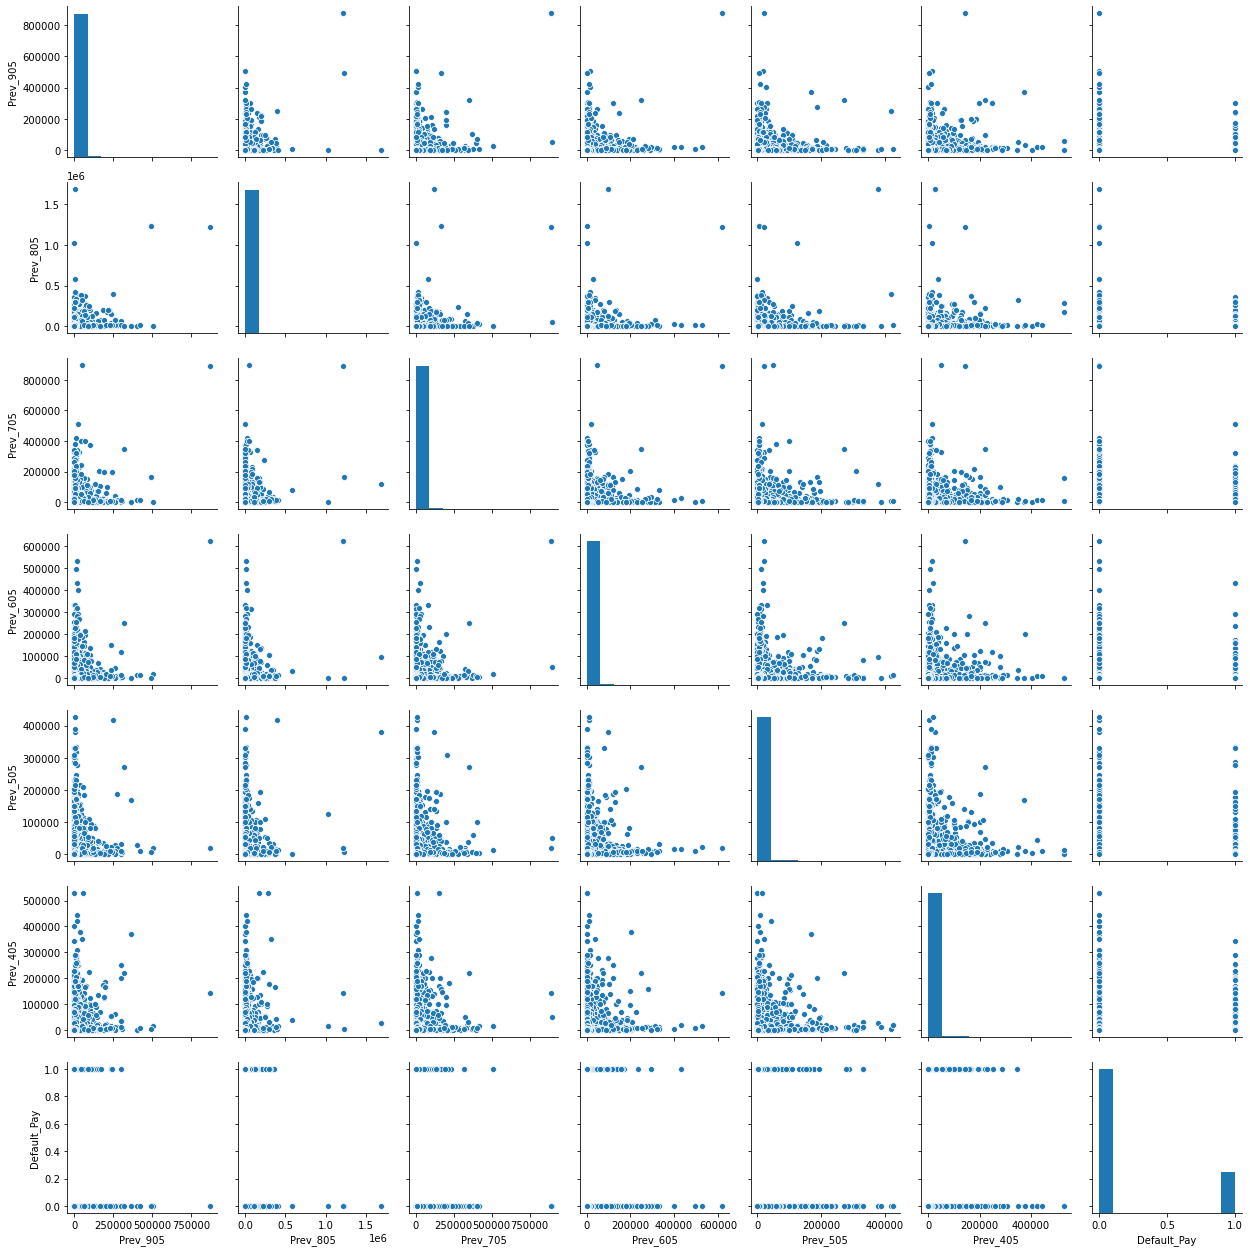

In [18]:
cols = ['Prev_905', 'Prev_805', 'Prev_705', 'Prev_605', 'Prev_505', 'Prev_405', 'Default_Pay']

sns.pairplot(df[cols], height=2.5)
plt.tight_layout()
plt.show()

Here, all 6 previous payment amounts have values between 0.8e6 and 1.0e6. Because of the presence of these values, we can assume that the values of 1.0e6 in the bill amount features are justified. There is the possibility of error, and because these values are outliers of the dataset they will be addressed.

## Comparing Feature and Target Variables

### Gender

(<matplotlib.axes._subplots.AxesSubplot at 0x7f91feb41d90>,
 <seaborn.axisgrid.FacetGrid at 0x7f91feb41610>)

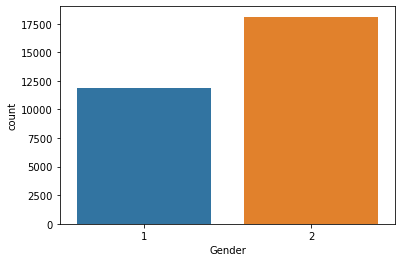

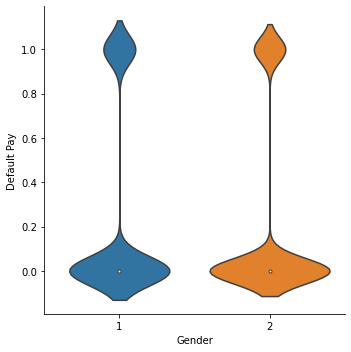

In [6]:
count = sns.countplot(x="Gender",data=df)
sex = sns.catplot(x="Gender",y="Default_Pay",data=df,kind="violin")
sex.set_ylabels("Default Pay")
sex.set_xticklabels(['Male (1)', 'Female (2)'])
count, sex

The gender representation in this dataset leans towards female (2), but are generally similar when it comes to default payment. Female clients are slightly more likely to not default on their payment, while male clients are slightly more likely to default on their payment.

### Education

(<matplotlib.axes._subplots.AxesSubplot at 0x7f9202b090d0>,
 <seaborn.axisgrid.FacetGrid at 0x7f92034e1820>)

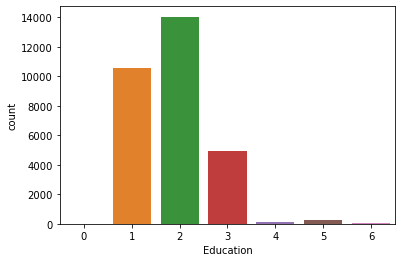

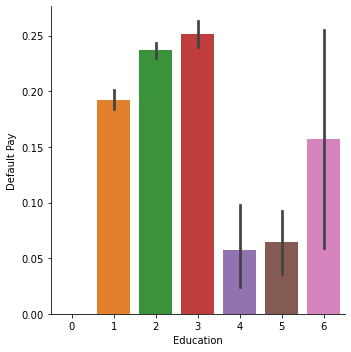

In [7]:
count = sns.countplot(x="Education",data=df)
ed = sns.catplot(x="Education",y="Default_Pay",data=df,kind="bar")
ed.set_ylabels("Default Pay")
count, ed

This dataset includes mostly college (1) and graduate-level (2) clients. However, high school (value=3) level clients are more likely to default their payments.

The feature variable "Education" includes values = 0, 5, and 6. These are illogical values.

(<matplotlib.axes._subplots.AxesSubplot at 0x7f92034d4790>,
 <seaborn.axisgrid.FacetGrid at 0x7f9202707fd0>)

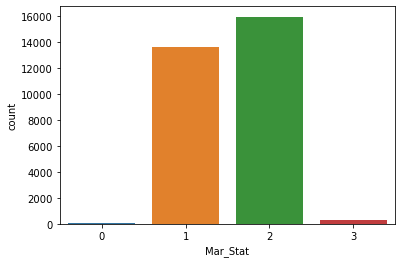

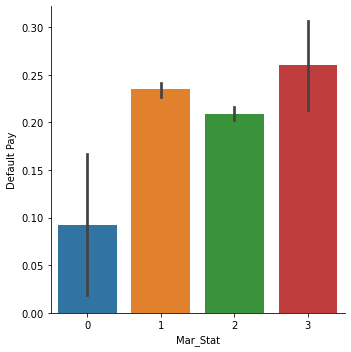

In [8]:
count = sns.countplot(x="Mar_Stat",data=df)
mar = sns.catplot(x="Mar_Stat",y="Default_Pay",data=df,kind="bar")
mar = mar.set_ylabels("Default Pay")
count, mar

Our data is roughly evenly split between married (1) and single (2) clients, and there is no clear correlation between Mar_Stat and Default_Pay with these values. We see that although other (3) is a very small proportion of the data, this group is more likely to vary in Default_Pay.

The feature variable "Mar_Stat" includes value = 0, which is an illogical value.

(<matplotlib.legend.Legend at 0x7f920352cdf0>,
 <seaborn.axisgrid.FacetGrid at 0x7f92037cfee0>)

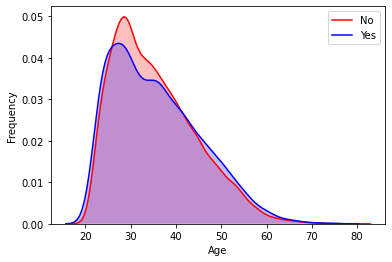

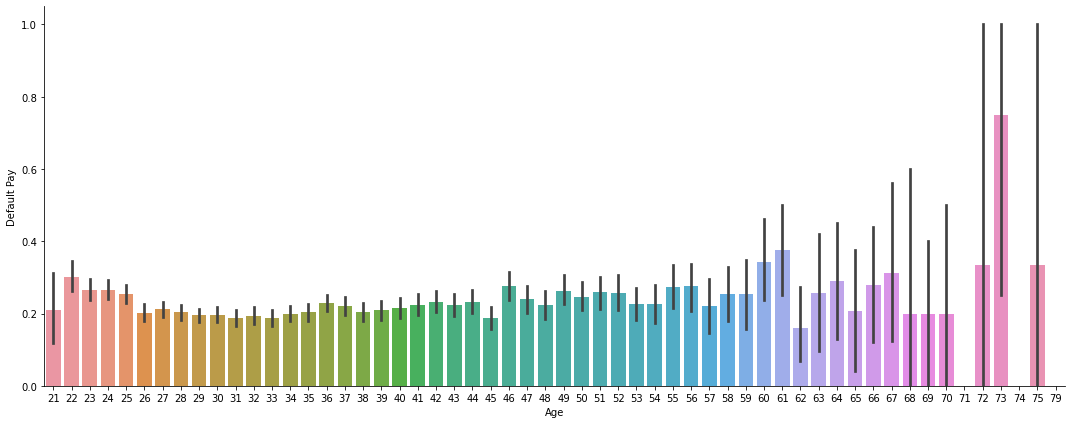

In [9]:
g = sns.kdeplot(df["Age"][(df["Default_Pay"] == 0) & (df["Age"].notnull())], color="Red", shade = True)
g = sns.kdeplot(df["Age"][(df["Default_Pay"] == 1) & (df["Age"].notnull())], ax =g, color="Blue", shade= True)
g.set_xlabel("Age")
g.set_ylabel("Frequency")
g = g.legend(["No","Yes"])

age = sns.catplot(x="Age",y="Default_Pay",data=df, kind="bar", height=6, aspect=2.5)
age = age.set_ylabels("Default Pay")
g, age

The age range is roughly 20 to 80, with the majority of data comprised of ages around 25-35 years. There is a lot more variance in default pay in ages 60 and older, which can possibly be attributed to the technology learning curve in older generations.

### Consolidating and Labeling Illogical Values

#### Outliers that will be re-labeled or added to the measurement scales of their respective feature, because of illogical data: 

>Repayment Status values that are not integers -1 and greater

Illogical values in Repayment Status include value = -2, which will be considered an "other" on the measurement scale.

>Marital Status values that are not integers 1, 2 or 3

Illogical values in Marital Status include all values above or below the existing measurement scale. This only includes value = 0, which will be considered an "unknown" and will be given a value of 4.

>Education Level values that are not integers 1, 2, 3, or 4

Illogical values in Education Level includes all values above or below the existing measurement scale. All these values less than 1 or greater than 4 will be re-valued at value = 5 and considered "unknown."

In [10]:
#Marital Status
mar_stat_drop = df.loc[(df['Mar_Stat'] < 1) | (df['Mar_Stat'] > 3)]
df.loc[df['Mar_Stat'] == 0, ['Mar_Stat']] = 4

#Education
education_drop = df.loc[(df['Education'] < 1) | (df['Education'] > 4)]

df.loc[df['Education'] == 0, ['Education']] = 5
df.loc[df['Education'] == 5, ['Education']] = 5
df.loc[df['Education'] == 6, ['Education']] = 5

(<seaborn.axisgrid.FacetGrid at 0x7f9202f1a0a0>,
 <seaborn.axisgrid.FacetGrid at 0x7f92033bf130>)

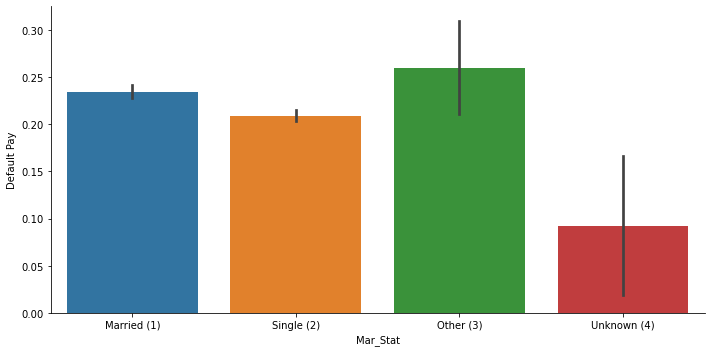

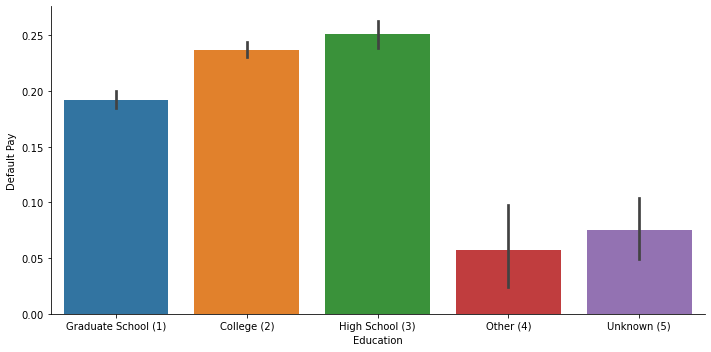

In [11]:
mar = sns.catplot(x="Mar_Stat",y="Default_Pay",data=df,kind="bar", aspect=2)
mar.set_ylabels("Default Pay")
mar.set_xticklabels(['Married (1)','Single (2)','Other (3)','Unknown (4)'])

ed = sns.catplot(x="Education",y="Default_Pay",data=df,kind="bar", height=5, aspect=2)
ed.set_ylabels("Default Pay")
ed.set_xticklabels(['Graduate School (1)','College (2)','High School (3)','Other (4)', 'Unknown (5)'])

mar, ed

After consolidating illogical values to a single "other" measurement, the distributions of education and marital status have been compressed.

## Balancing the Target Variable (Default Payment)
The target variable is imbalanced between 'no' values (77.88%) and 'yes' values (22.12%). To make sure the data is balanced, an oversampling technique will be used. SMOTE oversampling will increase the likelihood of overfitting, therefore the data will be run through more than one prediction model and evaluated using learning curves to determine overfitting/underfitting.

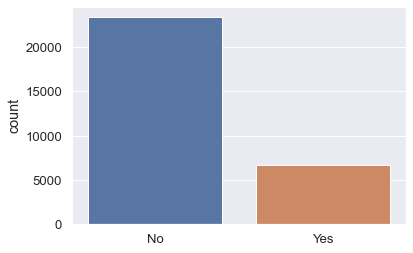

In [12]:
X = df.iloc[:, 1:-1].values
y = df.iloc[:, -1:].values.flatten()

sns.set(font_scale=1.2)
tv = sns.countplot(y)
tv.set_xticklabels(['No','Yes'])
plt.show()

### SMOTE Using Imblearn

In [13]:
X = df.iloc[:, 1:-1].values
y = df.iloc[:, -1:].values.flatten()

sm = SMOTE(random_state=123)
X_sm, y_sm = sm.fit_resample(X,y)
              
print('Original dataset shape', Counter(y))
print('Original dataset shape', Counter(y_sm))
X = X_sm
y = y_sm.ravel()# removes DataConversionError warning

sns.set(font_scale=1.2)
tv = sns.countplot(y)
tv.set_xticklabels(['No','Yes'])
plt.show()

NameError: name 'SMOTE' is not defined

The target variable data is now balanced. Later, I will check to make sure the chosen models are not overfit because of oversampling.

End Data Pre-Processing
___

# Splitting Data

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.3, 
                                                    random_state=123)
df.columns = ['ID', 'Credit', 'Gender', 'Education', 'Mar_Stat', 'Age',
              'Stat_905', 'Stat_805', 'Stat_705', 'Stat_605', 'Stat_505', 'Stat_405',
              'Bill_905', 'Bill_805', 'Bill_705', 'Bill_605', 'Bill_505', 'Bill_405',
              'Prev_905', 'Prev_805', 'Prev_705', 'Prev_605', 'Prev_505', 'Prev_405',
              'Default_Pay']

## Feature Scaling and PCA

In [17]:

sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_te

pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_std)
var = pca.explained_variance_ratio_
print("Top 2 Components:", var)st)

# Feature Analysis

We will evaluate feature importance using a heatmap and evaluate the top two important features using linear regression

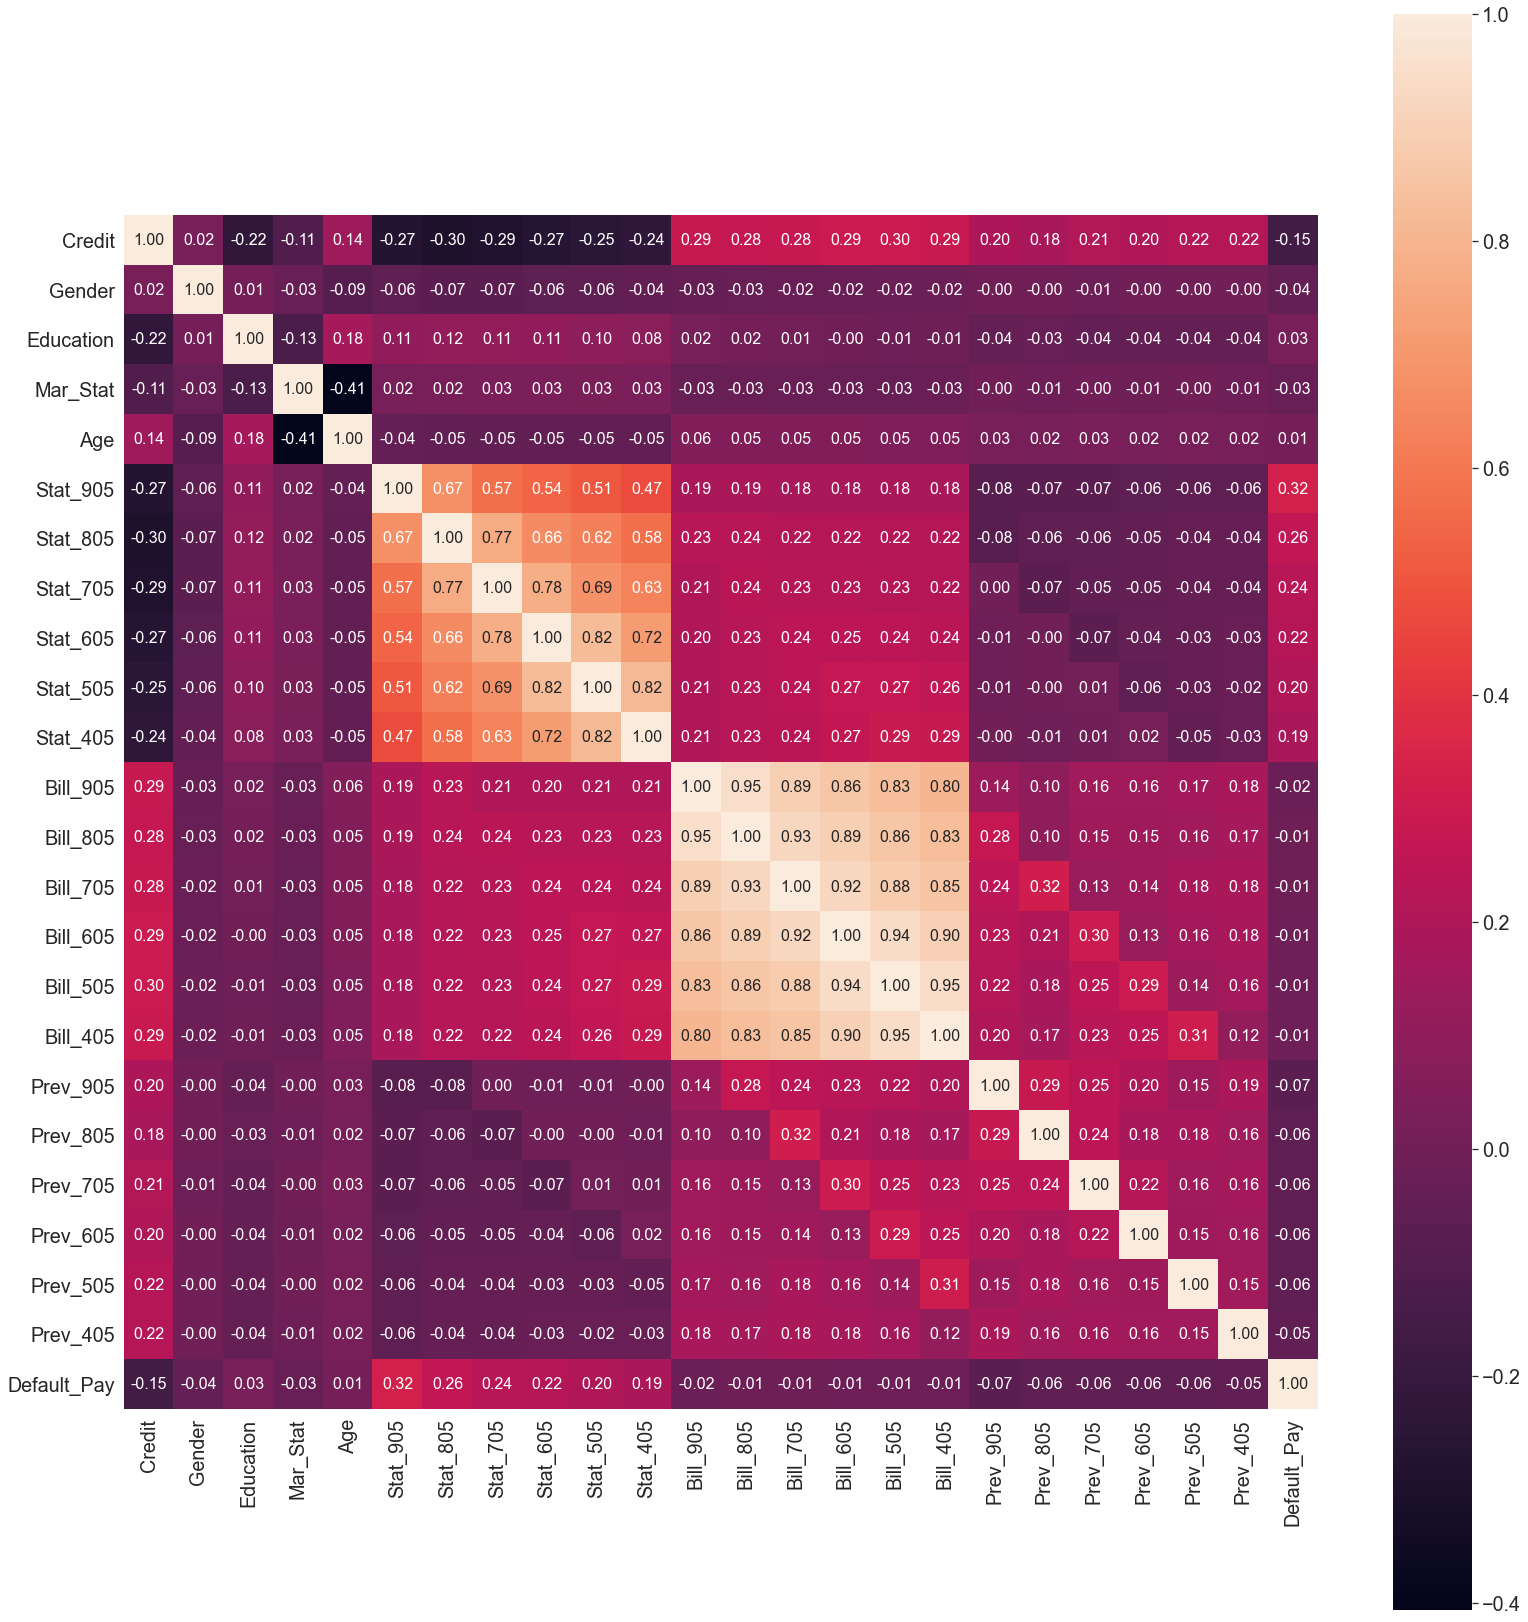

In [18]:
plt.figure(figsize=(23,23))
sns.set(font_scale=1.8)
cm1 = np.corrcoef(df[df.columns[1:]].values.T)
hm1 = sns.heatmap(cm1,
                 cbar=True,
                 annot=True,
                 square=True,
                 fmt='.2f',
                 annot_kws={'size': 16},
                 yticklabels=df.columns[1:],
                 xticklabels=df.columns[1:])
plt.tight_layout()
plt.show()

In this heatmap, we see that the greatest correlation to default payment is within the client's status. "Stat_905" and "Stat_805" have the greatest correlation coefficients with default payment with 0.32 and 0.26, respectively.

However, we also see that "Stat_905" and "Stat_805" correlate to eachother moderately high at 0.67. Considering the other correlations of the status features, these two features are the most likely to be correlated with deafult payment.

# Prediction Modeling
Decision Tree and Random Forest algorithms were chosen because of time, memory, and processing constraints. I also believe that tree-based algorithms will give the best overall and most easily comprehensible result for the data.

## Hyperparameter Searching

I will not be using accuracy scores because the original target variable (i.e. before SMOTE) is widely imbalanced. To further reduce the likelihood of inaccurate scoring because of imbalances, larger penalties will be assigned to wrong predictions on the minority ('yes') class using a class_weight for each algorithm that allows the parameter.

### Decision Tree

In [19]:
pipe_dclf = make_pipeline(DecisionTreeClassifier(class_weight='balanced'))
pipe_dclf.fit(X_train,y_train)
y_train_pred = pipe_dclf.predict(X_train)

param_grid = dict(decisiontreeclassifier__criterion=['gini', 'entropy'],
                  decisiontreeclassifier__max_depth=[20,24,28,32,36,40]
                  )

pipe_dclf_gs = GridSearchCV(estimator=pipe_dclf, 
                  param_grid=param_grid,
                  scoring=None,
                  cv=10,
                  n_jobs=-1)

pipe_dclf_gs.fit(X_train,y_train)

print('Best Criterion:', pipe_dclf_gs.best_estimator_.get_params()['decisiontreeclassifier__criterion'])
print('Best max_depth:', pipe_dclf_gs.best_estimator_.get_params()['decisiontreeclassifier__max_depth'])

Best Criterion: gini
Best max_depth: 28


### Random Forest

In [ ]:
pipe_rf = make_pipeline(RandomForestClassifier(class_weight='balanced'))
pipe_rf.fit(X_train,y_train)
y_train_pred = pipe_rf.predict(X_traid)))

param_grid = dict(decisiontreeclassifier__criterion=['gini', 'entropy'],
                  decisiontreeclassifier__max_depth=[20,24,28,32,36,40]
                  )

pipe_dclf_gs = GridSearchCV(estimator=pipe_dclf, 
                  param_grid=param_grid,
                  scoring=None,
                  cv=10,
                  n_jobs=-1)

pipe_dclf_gs.fit(X_train,y_train)

print('Best Criterion:', pipe_dclf_gs.best_estimator_.get_params()['decisiontreeclassifier__criterion'])
print('Best max_depth:', pipe_dclf_gs.best_estimator_.get_params()['decisiontreeclassifier__max_depth'])

R^2 train: 0.997
Best Criterion: entropy
Best max_depth: 36


## Learning Curves

In [ ]:
def plot_learning_curve(estimator, title, X, y, axes=None, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    if axes is None:
        _, axes = plt.subplots(1, 3, figsize=(20, 5))

    axes[0].set_title(title)
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = \
        learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs,
                       train_sizes=train_sizes,
                       return_times=True)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    axes[0].grid()
    axes[0].fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1,
                         color="r")
    axes[0].fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1,
                         color="g")
    axes[0].plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
    axes[0].plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")
    axes[0].legend(loc="best")

    # Plot n_samples vs fit_times
    axes[1].grid()
    axes[1].plot(train_sizes, fit_times_mean, 'o-')
    axes[1].fill_between(train_sizes, fit_times_mean - fit_times_std,
                         fit_times_mean + fit_times_std, alpha=0.1)
    axes[1].set_xlabel("Training examples")
    axes[1].set_ylabel("fit_times")
    axes[1].set_title("Scalability of the model")

    # Plot fit_time vs score
    axes[2].grid()
    axes[2].plot(fit_times_mean, test_scores_mean, 'o-')
    axes[2].fill_between(fit_times_mean, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1)
    axes[2].set_xlabel("fit_times")
    axes[2].set_ylabel("Score")
    axes[2].set_title("Performance of the model")

    return plt

#### Random

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py'>

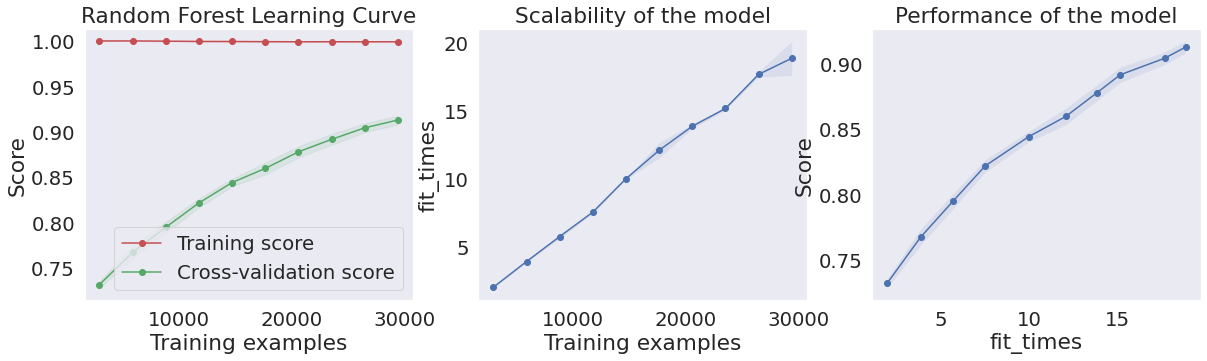

In [ ]:
pipe_rf = make_pipeline(RandomForestClassifier(criterion='entropy', max_depth=36, class_weight='balanced'))
pipe_rf.fit(X_train,y_train)

plot_learning_curve(pipe_rf, 'Random Forest Learning Curve', X_train, y_train, 
                    axes=None, ylim=None, cv=10, n_jobs=-1, 
                    train_sizes=np.linspace(.1, 1.0, 10))

The training score here shows that the training model is very overfit, producing a perfect score while the CV score returns a score of ~0.93.

#### Decision Trees

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py'>

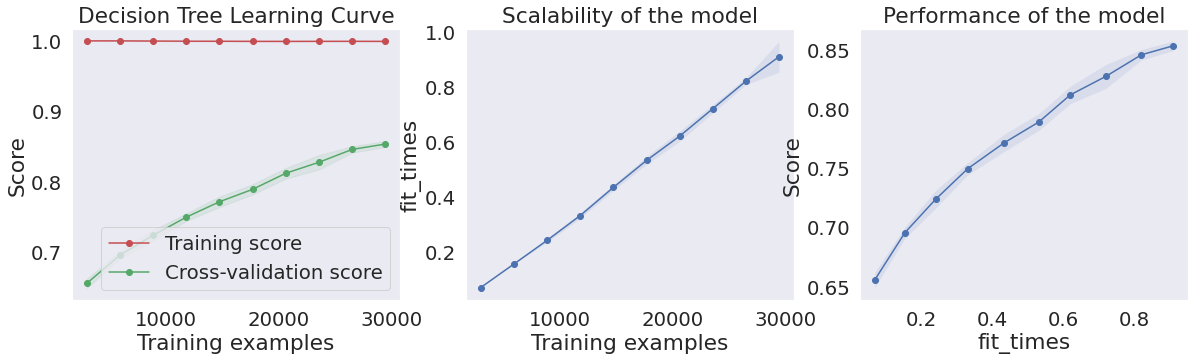

In [ ]:
pipe_dclf = make_pipeline(DecisionTreeClassifier(criterion='gini', max_depth=28, class_weight='balanced'))
pipe_dclf.fit(X_train,y_train)

plot_learning_curve(pipe_dclf, 'Decision Tree Learning Curve', X_train, y_train, 
                    axes=None, ylim=None, cv=10, n_jobs=-1, 
                    train_sizes=np.linspace(.1, 1.0, 10))

The training score here shows that the training model is very overfit, producing a perfect score while the CV score returns a score of ~0.88.



# Evaluate Performance

The evaluation metric that I preferred to use is f1 scoring. I chose this metric because it is specifically used for evaluating binary targets. I also used precision scoring and recall scoring because it is good to evaluate in comparison to f1 scoring. Additionally, I used a make_scorer in conjunction with the GridSearchCV to make sure that the imbalanced target variable data was taken into account (an extra precaution on top of running the target variable through SMOTE).

#### Random Forest

In [ ]:
y_pred = pipe_rf.predict(X_test)
y_test_pred = pipe_rf.predict(X_test)

print('Precision: %.3f' % precision_score(y_true=y_test, y_pred=y_pred))
print('Recall: %.3f' % recall_score(y_true=y_test, y_pred=y_pred))
print('F1: %.3f' % f1_score(y_true=y_test, y_pred=y_pred))

Precision: 0.900
Recall: 0.955
F1: 0.927
R^2 train: 0.997, test: 0.698


#### Decision Tree

In [ ]:
y_pred = pipe_rf.predict(X_test)
y_test_pred = pipe_rf.predict(X_test)

print('Precision: %.3f' % precision_score(y_true=y_test, y_pred=y_pred))
print('Recall: %.3f' % recall_score(y_true=y_test, y_pred=y_pred))
print('F1: %.3f' % f1_score(y_true=y_test, y_pred=y_pred))

Precision: 0.900
Recall: 0.955
F1: 0.927
R^2 train: 0.997, test: 0.698


# Conclusion

- What is your model's results? Is it good? Do you have any concerns?
  - The results of testing are relatively high, which would indicate a good model for this scenario; however, because I oversampled the target data, it cannot reliably be said that these results are accurate. I concluded from the learning curves and k-fold cv models that the models are overfit. Therefore, more intensive algorithms (i.e. SVM, NaiveBayes) would create a better prediction model given less time and memory constraints.

  - Given more time, it would be appropriate to collect more data so that the target variable is not imbalanced. If that is not an option, better sampling techniques could be explored. This would hopefully address overfitting in future models. Additionally, future research should look into more memory- and time-intensive algorithms such as SVM because they are likely to deliver more accurate modeling than the tree-based models.
  
  - Overall, this model could be a good candidate for predicting whether or not a client will default on their credit card payments.